## *`Web Scraping with Python`* 
### *`Extracting Information from the Web`*

In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import squarify

### *`First Web Scraping Attempt`* 

In [2]:
# Define the URL and fetch the page content
url_one = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_n%C3%BAmero_de_aeropuertos'
page_one = rq.get(url_one).text

In [3]:
# Parse the HTML using BeautifulSoup
soup_one = bs(page_one, 'html.parser')
table_one = soup_one.find('table')

In [4]:
# Create an empty DataFrame
df_one = pd.DataFrame(columns=['Position', 'Country', 'Airports', 'Year'])

In [5]:
# Extract data from table rows and populate the DataFrame
for row in table_one.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]

    if len(cols) >= 4:
        Puesto = cols[0]
        País = cols[1]
        Aeropuertos = cols[2]
        Año = cols[3]

        row_data_one = {'Position': Puesto, 'Country': País, 'Airports': Aeropuertos, 'Year': Año}
        df_one = pd.concat([df_one, pd.DataFrame([row_data_one])])

print(df_one)

   Position                                     Country Airports  Year
0         1                              Estados Unidos    15095  2022
0         2                                      Brasil     4093  2022
0         4                                      Canadá     1467  2015
0         5                                       Rusia     1218  2015
0         6                                   Argentina     1138  2015
..      ...                                         ...      ...   ...
0       231  Santa Helena, Ascensión y Tristán de Acuña        1  2013
0       232                        San Martín (Francia)        1  2013
0       233                   San Martín (Países Bajos)        1  2013
0       234                                      Tuvalu        1  2013
0       235                                    Barbados        1  2013

[234 rows x 4 columns]


In [6]:
# Create the CSV file
df_one.to_csv('datos_airports.csv', index=False)

### *`Second Web Scraping Attempt`* 

In [7]:
# Define the second URL and fetch the page content
url_two = 'https://es.wikipedia.org/wiki/Poblaci%C3%B3n_mundial#Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n_2023'
page_two = rq.get(url_two).text

In [8]:
# Parse the second HTML using BeautifulSoup
soup_two = bs(page_two, 'html.parser')
table_two = soup_two.find_all('table')
table_two = table_two[8]

In [9]:
# Create a second Empty DataFrame
df_two = pd.DataFrame(columns=['Position', 'Country', 'Population'])

In [10]:
# Extract data from the second table rows and populate the DataFrame
for row in table_two.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]

    if len(cols) >= 3:
        Puesto = cols[0]
        País = cols[1]
        Población = cols[2]

        row_data_two = {'Position': Puesto, 'Country': País, 'Population': Población}
        df_two = pd.concat([df_two, pd.DataFrame([row_data_two])])
        
print(df_two)

   Position              Country     Population
0         1                China  1 413 142 846
0         2                India  1 399 179 585
0         3       Estados Unidos    339 665 118
0         4            Indonesia    279 476 346
0         5             Pakistán    247 653 551
..      ...                  ...            ...
0       228              Tokelau          1 647
0       229        Islas Paracel          1 440
0       230  Ciudad del Vaticano          1 000
0       231          Islas Cocos            596
0       232       Islas Pitcairn             50

[232 rows x 3 columns]


In [11]:
# Convert 'Population' column to strings
df_two['Population'] = df_two['Population'].astype(str)

# Remove spaces and commas from 'Population' column
df_two['Population'] = df_two['Population'].str.replace(' ', '').str.replace(',', '')

In [12]:
# Create the second CSV file
df_two.to_csv('datos_population.csv', index=False)

### *`Data Visualization`*

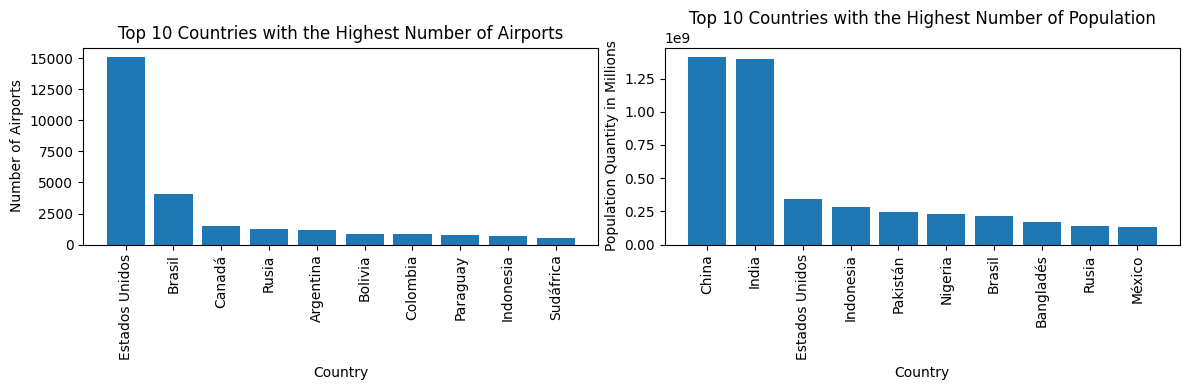

In [13]:
# Convert 'Airports' column to numeric type
df_one['Airports'] = pd.to_numeric(df_one['Airports'], errors='coerce')

# Convert 'Population' column to numeric type
df_two['Population'] = pd.to_numeric(df_two['Population'], errors='coerce')

plt.figure(figsize=(12, 4))

# Bar chart - Airports
top_10_airports = df_one.nlargest(10, 'Airports')
plt.subplot(1, 2, 1)
plt.bar(top_10_airports['Country'], top_10_airports['Airports'])
plt.xlabel('Country')
plt.ylabel('Number of Airports')
plt.title('Top 10 Countries with the Highest Number of Airports')
plt.xticks(rotation=90)

# Bar chart - Population
top_10_population = df_two.nlargest(10, 'Population')
plt.subplot(1, 2, 2)
plt.bar(top_10_population['Country'], top_10_population['Population'])
plt.xlabel('Country')
plt.ylabel('Population Quantity in Millions')
plt.title('Top 10 Countries with the Highest Number of Population')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

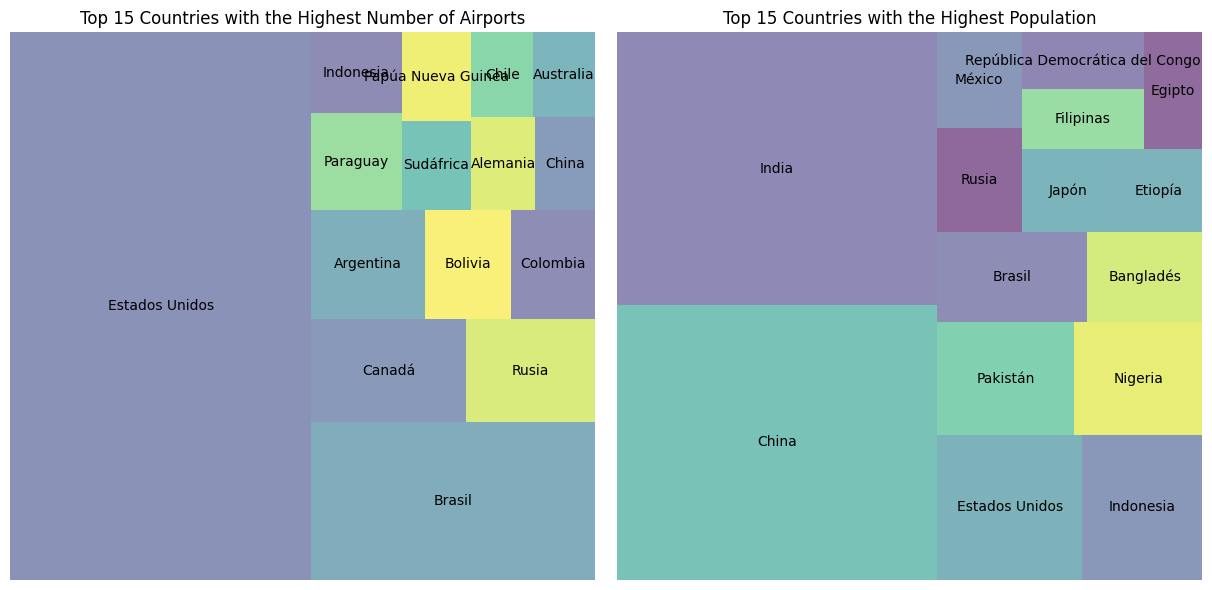

In [14]:
# Limit to the first 15 countries - Population
limited_df_one = df_one.head(15)

# Sort the DataFrame by population in descending order
limited_df_one = limited_df_one.sort_values('Airports', ascending=False)

# Calculate proportional sizes based on the population of each country
sizes_one = limited_df_one['Airports'].values

# Limit to the first 15 countries - Airports
limited_df_two = df_two.head(15)

# Sort the DataFrame by population in descending order
limited_df_two = limited_df_two.sort_values('Population', ascending=False)

# Calculate proportional sizes based on the population of each country
sizes_two = limited_df_two['Population'].values

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 6))

# Generate the treemap - Population
squarify.plot(sizes=sizes_one, label=limited_df_one['Country'], alpha=0.6, ax=ax1)
ax1.set_title('Top 15 Countries with the Highest Number of Airports')
ax1.axis("off")

# Generate the treemap - Airports
squarify.plot(sizes=sizes_two, label=limited_df_two['Country'], alpha=0.6, ax=ax2)
ax2.set_title('Top 15 Countries with the Highest Population')
ax2.axis("off")

plt.tight_layout()
plt.show()

### *`Merging the DataFrames Extracted from the Web`*

In [15]:
# Merge the two dataframes on the 'Country' column
merged_df = df_one.merge(df_two, on='Country')

# Convert 'Airports' and 'Population' columns to numeric types
merged_df['Airports'] = pd.to_numeric(merged_df['Airports'], errors='coerce')
merged_df['Population'] = pd.to_numeric(merged_df['Population'], errors='coerce')

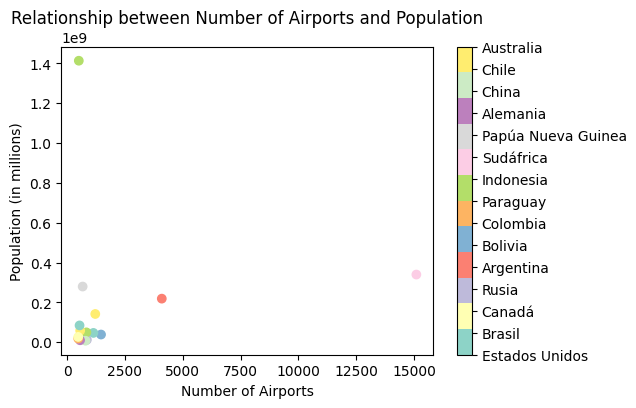

In [16]:
# Scatter plot
plt.figure(figsize=(6, 4))

# Limit to the first 15 countries
limited_df = merged_df.head(15)

# Assign a unique numerical value to each country
country_codes = limited_df['Country'].astype('category').cat.codes

scatter = plt.scatter(limited_df['Airports'], limited_df['Population'], c=country_codes, cmap='Set3', alpha=1)

# Set labels and title
plt.xlabel('Number of Airports')
plt.ylabel('Population (in millions)')
plt.title('Relationship between Number of Airports and Population')

# Colorbar to display corresponding countries
colorbar = plt.colorbar(scatter)
colorbar.set_ticks(np.arange(len(limited_df['Country'].unique())))
colorbar.set_ticklabels(limited_df['Country'].unique())

plt.show()

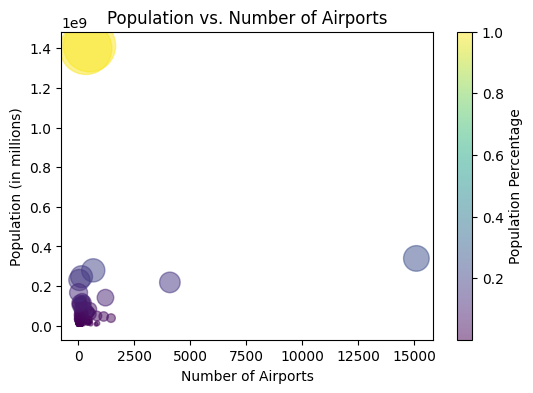

In [17]:
# Get the top 15 countries with the highest population percentage
top_countries = merged_df.nlargest(15, 'Population')['Country']

plt.figure(figsize=(6, 4))

# Define colors for the points based on the population percentage
colors = merged_df['Population'] / merged_df['Population'].max()

# Scatter plot with colors and sizes proportional to population
plt.scatter(merged_df['Airports'], merged_df['Population'], s=merged_df['Population']/1000000, c=colors, alpha=0.5)

# Label the points with the names of the top 15 countries
for i, country in enumerate(merged_df['Country']):
    if country in top_countries:
        plt.annotate(country, (merged_df['Airports'][i], merged_df['Population'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of Airports')
plt.ylabel('Population (in millions)')
plt.title('Population vs. Number of Airports')

plt.colorbar(label='Population Percentage')
plt.show()
